## 

In [1]:
import pandas as pd

##### Getting CSV Files Directly From GitHub 
Copy the url to the GitHub csv file in your browser and pass it to the "snythesize_url" function to get it formatted for the Pandas object to be able to read directly.

In [90]:
# Getting CSV File from GitHub uring the url copied from the browser
def synthesize_url(copied_url):
    return "https://raw.githubusercontent.com/" + copied_url.split('.com/')[1].replace('blob/', '')

In [91]:

copied_url ="https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv"
csv = synthesize_url(copied_url)
df = pd.read_csv(csv)
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Getting Info For Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# STATISTICS OF EACH COLUMN
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Setup

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Age

In [7]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


=> Age is numeric column with minimum age of 18 and maximun age of 64. <br>
=> Box Plotting Age using 47 bins (64-18+1) histogram (one for each year) with plotly to visualise the distribution of age. <br>
=> This will show the number of customers in each age group

In [8]:
fig = px.histogram(
    df, 
    x='age',
    marginal='box',
    nbins=47, 
    color_discrete_sequence=['green'],
    title='Age Distribution'
)
fig.update_layout(bargap=0.1)
fig.show()

#### Body Mass Index - BMI
Visualising the BMI of customers using histogram and bosplot

In [9]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [19]:
fig = px.histogram(
    df, 
    x='bmi',
    marginal='box',
    color_discrete_sequence=['brown'],
    title='BMI Distribution'
)
fig.update_layout(bargap=0.1)
fig.show()

The measurements of BMI form a <a href="https://en.wikipedia.org/wiki/Normal_distribution" style='text-decoration:underline;'>Gaussian or Normal Distribution</a> centered around the value 30, with few outliers towards the right. <br>

<div style="text-align:center"><img src="https://static.vecteezy.com/system/resources/previews/016/828/833/original/bmi-classification-chart-measurement-woman-colorful-infographic-with-ruler-female-body-mass-index-scale-collection-from-underweight-to-overweight-fit-person-different-weight-level-eps-vector.jpg" style='width:85%; height:500px;' alt="bmi" /></div>

#### Charges
Visualisation of the Annual Medical Charges for customers. <br>
Will use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [11]:
plot = px.histogram(
    df, 
    x='charges',
    marginal='box',
    color='smoker',
    color_discrete_sequence=['red', 'green'],
    title='Annual Medical Charges By Smoking Habit'
)
plot.update_layout(bargap=0.1)
plot.show()

##### Observations
<ul>
The above plot shows the following observations:
<li>Most customers have their medical charges under $10,000. A small number of customers have high medical expenses, probably due to accidents, majr illnesses, and genetic diseases. the distribution follows a <a href="https://en.wikipedia.org/wiki/Power_law" style='text-decoration:underline'>Power Law</a></li>
<li>There appears a remarkable difference in medical expenses between smokers and non-smokers.<br>
While the median for non-smokers is $7,300, the median for smokers is close to $35,000.</li>


</ul>

In [12]:
plot = px.histogram(
    df, 
    x='charges',
    marginal='box',
    color='sex',
    color_discrete_sequence=['magenta', 'blue'],
    title='Annual Medical Charges By Gender'
)
plot.update_layout(bargap=0.1)
plot.show()

In [13]:
plot = px.histogram(
    df, 
    x='charges',
    marginal='box',
    color='region',
    color_discrete_sequence=['blue', 'magenta', 'brown', 'forestgreen'],
    title='Annual Medical Charges By Region'
)
plot.update_layout(bargap=0.1)
plot.show()

#### Smokers
Exploring the Smokers ("yes" and "no" values) with histogram

In [14]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [15]:
px.histogram(df, x='smoker', color='sex', title='Smokers')

#### Charges By Age
Visualising the relationship between "age" and "charges" using a scatter plot. Each pint in the scatter plot represents one customer. The values in the smoker column will be used to color the points.

In [16]:
plot = px.scatter(
    df, 
    x='age',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title='Charges By Age'
)
plot.update_traces(marker_size=5)
plot.show()

<ul>
The above plot shows the following observations:
<li>The plot shows a general trend, suggesting that medical charges increase with age, a desired expectation. But the plot also shows that the expenses are remarkably variant at every age, indicating that age alone cannot be use to accurately determine the charges.
</li>
<li>
    <ol>The plot shows three clusters of data points, seemingly forming a line with +ve gradient:
        <li>The 1st cluster consists primarily of prsumably health non-smokers who have relatively low medical charges comparted to others.
        </li>
        <li>The 2nd cluster contains a mix of smokers and non-smokers. This could possibly be two distinct but overlapping clusters: non-smokers with medical issues and smolers without major medical issues.
        </li>
        <li>The 3rd clust consists exclusively of smokers with presumably major medical issues that are possible related to or worsened by smoking.
        </li>
    </ol>
    
</li>



#### Charges By BMI

In [17]:
plot = px.scatter(
    df, 
    x='bmi',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title='Charges By BMI'
)
plot.update_traces(marker_size=5)
plot.show()

##### Observation
The plot is showing that for non-smokers, an increase in BMI does not seem to affect their medical charges. But for smokers with BMI >=30, it shows a remarkable spike in charges.

##### Charges By Gender 

In [28]:
# Violin Plot
plot = px.violin(
    df, 
    x='children',
    y='charges',
    title='Charges By Number of Children'
)
plot.update_traces(marker_size=5)
plot.show()

### The overall analysis is showing that the values in some columns are closely related to charges compared to others. For example, Age grows with Charges while BMI doesn't. 
Correlation Coefficient is use to numerically express the relationship betweem the charges and other variables.
<ul>
    <li>Strength: the greater the absolut value of the correlation coefficient, the stronger the relationship.
        <ul>
            <li>the extreme values of -1 and 1 indicate a perfectly linear relatioship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line, though not practicable.
            </li>
            <li>
                A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
            </li>
            <li>
            when the value is between 0  and +1/-1, there is a relationship, but the points don't all fall on a line. As r approaches -1 and 1, the strength of the relationship increases and the data points tend to fall closer to a line.
            </li>
        </ul>
    </li>
    <li>
    Direction: The sign of the correlation coefficient represents the direction of the relationship.
    <ul>
        <li>
            Positive coefficients indicate that when the alue of one variable increases, the v alue of the other variable also increase (upward slope)
        </li>
        <li>
            Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends ot decrease (downward slope)
        </li>
    </ul>


</ul>


In [92]:
# Display Correlation Coefficients
smoker_values = {'yes':1, 'no':0}
smoker_numeric = df.smoker.map(smoker_values)
gender_values = {'male':1, 'female':0}
gender_numeric = df.sex.map(gender_values)


print(f"Charges vs Age: {df.charges.corr(df.age)}\n"
      f"Charges vs Gender: {df.charges.corr(gender_numeric)}\n"
      f"Charges vs Smoker: {df.charges.corr(smoker_numeric)}\n"
      f"Charges vs BMI: {df.charges.corr(df.bmi)}\n")

df_corrs = df
df_corrs['sex'] = gender_numeric
df_corrs['smoker'] = smoker_numeric


Charges vs Age: 0.29900819333064765
Charges vs Gender: 0.057292062202025415
Charges vs Smoker: 0.7872514304984772
Charges vs BMI: 0.19834096883362892



##### Corr on all variables

In [97]:

df_heat = df.drop(['region', 'sex', 'smoker'], axis=1)
df_heat

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


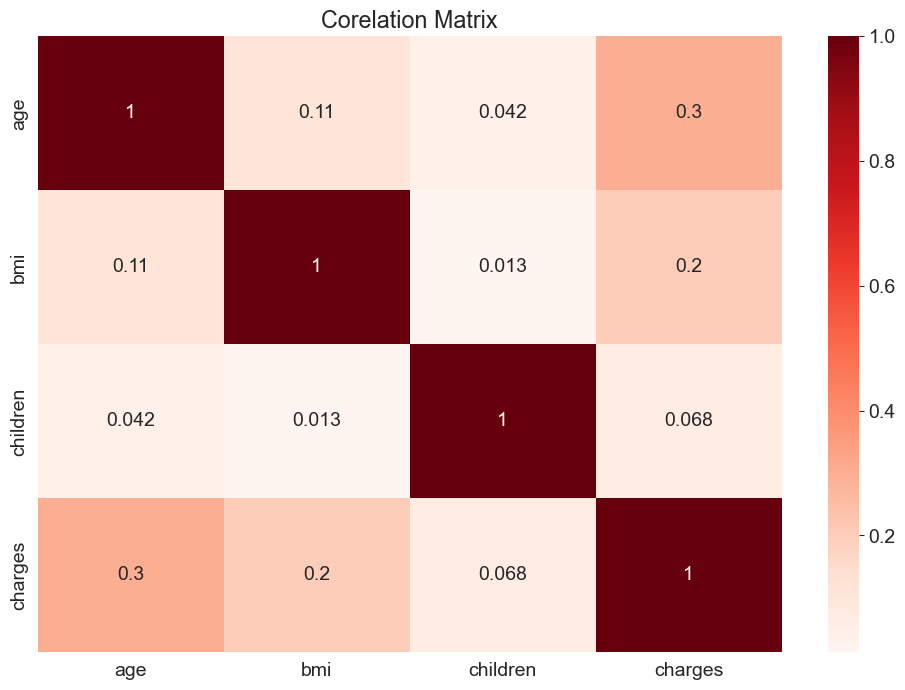

In [99]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_heat.corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

#### Linear Regression Using Single Feature